# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv('PokemonDB.csv')
df.columns

Index(['#', 'Name', 'Variation', 'Type1', 'Type2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype='object')

In [22]:
df = df.fillna('None')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #          1190 non-null   int64 
 1   Name       1190 non-null   object
 2   Variation  1190 non-null   object
 3   Type1      1190 non-null   object
 4   Type2      1190 non-null   object
 5   Total      1190 non-null   int64 
 6   HP         1190 non-null   int64 
 7   Attack     1190 non-null   int64 
 8   Defense    1190 non-null   int64 
 9   Sp. Atk    1190 non-null   int64 
 10  Sp. Def    1190 non-null   int64 
 11  Speed      1190 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 111.7+ KB


In [24]:
df.head()

,#,Name,Variation,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,None,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,None,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,None,Grass,Poison,525,80,82,83,100,100,80
3,3,Venusaur,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,None,Fire,None,309,39,52,43,60,50,65


# My Question

### What is the Standard Deviation of HP? And, given this, how impressive is Regigigas?

# My Analysis

In [32]:
df.loc[596]

#                  486
Name         Regigigas
Variation         None
Type1           Normal
Type2             None
Total              670
HP                 110
Attack             160
Defense            110
Sp. Atk             80
Sp. Def            110
Speed              100
Name: 596, dtype: object

 ### This is the pokemon im trying to solve for.

The Average of HP = 70.8529411764706
Standard Deviation of HP = 26.88644257870807


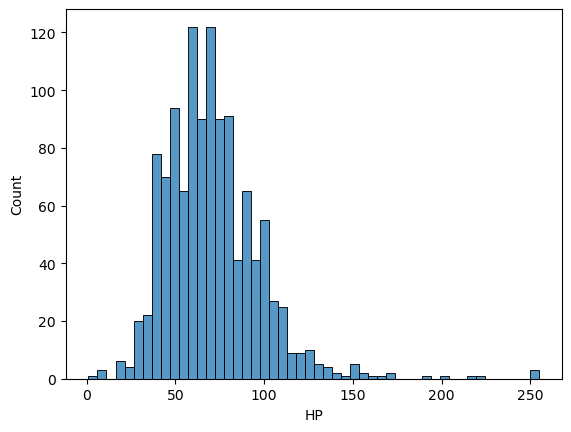

In [40]:
sns.histplot(df,x='HP',bins=50)
def dev(column):
    return column.std()
stdHP = dev(df["HP"])
avgHP = df["HP"].mean()
print ("The Average of HP =",avgHP)
print("Standard Deviation of HP =",stdHP)

## This is the graph of all the pokemons HP.

In [41]:
lHP = avgHP - stdHP
uHP = avgHP + stdHP
print("Most of the data lands between", lHP, "and", uHP)

Most of the data lands between 43.966498597762524 and 97.73938375517866


### Subtracting and adding the standard deviation to the average to find where most of the data lands.

In [42]:
idx = 0
for pokemon in df["Name"]:
    if "Regigigas" in pokemon:
        break
    idx += 1
HPScore = ((df.loc[idx]['HP']) - avgHP) / stdHP 
print( "The pokemon's HP score =", HPScore)

The pokemon's HP score = 1.4560148189530575


### The code here allows you to plug in any pokemon name and finds its Z-score for HP.

In [45]:
UpperHP = 0
AllHP = 0
for pokemon in df['HP']:
    if pokemon >= 94.793 and pokemon <= 120.326:
        UpperHP += 1
        AllHP +=1
    elif pokemon <= 94.793:
        AllHP += 1
    elif pokemon >= 120.326:
        AllHP
        
print("In range of Regigigas:",UpperHP)
print("All pokemon:",AllHP)

In range of Regigigas: 163
All pokemon: 1149


### Shows how many more pokemon are in that range with Regigigas.

# My Answer

***The Standard Deviation of HP is 25.534. This means that most of the data landed 25.534 HP from the average. The average being 69.258 HP, meaning that the data landed between 43.724 HP to 94.792 HP. Regigigas is pretty impressive compared to the data with a Z-score of 1.595. The reason this score is impressive is because its outside the range of where most data is landing Z-score shows how many deviations its above the average. So this means Regigigas is 1.595 deviations above the mean putting them in this range of 94.793 HP to 120.326 HP. Which is impressive since only 99 other pokemon out of 776 are in that range some are higher.***